# Introdução ao K Nearest Neighbours (KNN)

KNN é um algoritmo de classificação de dados muito simples

*Exemplo:* imagine que temos um conjunto de alturas e pesos de cachorros e cavalos. A ideia é que dado uma relação de (peso x altura) desse conjunto, o modelo consiga estimar se aquele animal é um cachorro ou um cavalo.

<img src="cachorro-cavalo.png" alt="knn" width=500>

Mas como o algoritmo opera:

* Algoritmo de treino:
    1. Guarde os dados
    
* Algoritmo de teste-preditor:
    1. Calcule a distância do 'x' até os demais pontos
    2. Organize os dados em ordem crescente de distância
    3. Classifique a classe de acordo com a maioria dos primeiros 'k' valores
    
* Prós:
    * Muito simples
    * Processo de treino é trivial 
    * Funciona muito bem com um grande número de classes
    * Fácil de adicionar mais dados
    * Poucos parâmetros (K e métrica de distância)
    
* Contras:
    * Elevado custo computacional para predição
    * Não é muito bom com dados em múltiplas dimensões (muitos parâmetros)
    * Parâmetros categóricos não funcionam muito bem

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('Classified_Data.csv')

In [5]:
del df['Unnamed: 0']
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


* Nesse tipo de dado temos alguns fatores que podem afetar nosso modelo. Por exemplo: se essa tabela estiver relacionada com a probabilidade do tumor da pessoa ser maligno ou não. Se uma dessas variáveis for o tamanho do tumor, essa variável pode ter um peso maior que as outras.
* Além disso, vamos supor que uma outra variável seja o resultado de algum tipo de exame que a pessoa faça para ter informações sobre o tumor. Pode ser que essa variável ainda esteja relacionada com uma outra variável que não está presente nessa tabela.
* Sendo assim, variáveis terão relações impactantes diferentes na hora de calcular as distâncias do KNN. Precisamos então normalizar essas variáveis antes de criar o modelo.
* Para o KNN a normalização dos dados é fundamental

In [11]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   WTT           1000 non-null   float64
 2   PTI           1000 non-null   float64
 3   EQW           1000 non-null   float64
 4   SBI           1000 non-null   float64
 5   LQE           1000 non-null   float64
 6   QWG           1000 non-null   float64
 7   FDJ           1000 non-null   float64
 8   PJF           1000 non-null   float64
 9   HQE           1000 non-null   float64
 10  NXJ           1000 non-null   float64
 11  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 93.9 KB


## Tratamento dos dados

In [6]:
from sklearn.preprocessing import StandardScaler

In [8]:
# Vamos normalizar o modelo de acordo com todos os dados exceto o 'TARGET CLASS' que é nosso dado de saída

scaler = StandardScaler()

scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [9]:
# O método .transform vai transformar nosso dataframe. Ele vai tirar média, desvio padrão, vai pegar ponto-a-ponto
# vai recalcular ele normalizando-o.

df_normalizado = scaler.transform(df.drop('TARGET CLASS', axis=1))

df_normalizado

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

* Nosso df_normalizado é uma matriz com vários valores. Vamos transformá-lo em dataframe

In [14]:
df_param = pd.DataFrame(df_normalizado, columns=df.columns[:-1])

df_param

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


## Separação dos dados de treino e test

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# O 'X' vai ser o dataframe normalizado e o 'Y' vai ser a coluna 'TARGET CLASS' do dataframe original

X_train, X_test, Y_train, Y_test = train_test_split(df_param, df['TARGET CLASS'], test_size=0.3)

## Treino do modelo

In [17]:
from sklearn.neighbors import KNeighborsClassifier

* A diferença do KNN para os outros tipos de análise vistos até agora é que para criar um objeto da classe é necessário passar um valor do parâmetro 'n_neighbos'
* n_neighbors=x : esse parâmetro vai classificar um determinado ponto de acordo com os 'x' vizinhos mais próximos
* Vamos começar com o caso mais simples: apenas com 1 vizinho mais próximo

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
predictions = knn.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       144
           1       0.92      0.94      0.93       156

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [22]:
print(confusion_matrix(Y_test,predictions))

[[131  13]
 [ 10 146]]


#### Precisão: quanto em média o modelo acerta?

$$
\frac{TN + TP}{total} = \frac{277}{300} = 0.92
$$

#### Classificações incorretas: quanto em média o modelo erra? 

$$
\frac{FN + FP}{total} = \frac{23}{300} = 0.08
$$

* Mas se tratando do método KNN, como podemos melhorar o método?
* Podemos aumentar o número de vizinhos (n_neighbors)
* Mas qual seria o número ideal de n_neighbors? Precisamos fazer um teste

In [26]:
# O error_rate vai armazenar a médio do erro (diferença entre as predições e o valor real) conforme vamos 
# aumentando o número de vizinhos
error_rate = []

for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    predictions = knn.predict(X_test)
    error_rate.append(np.mean( predictions != Y_test ))

Text(0.5, 0, 'n_neighbors')

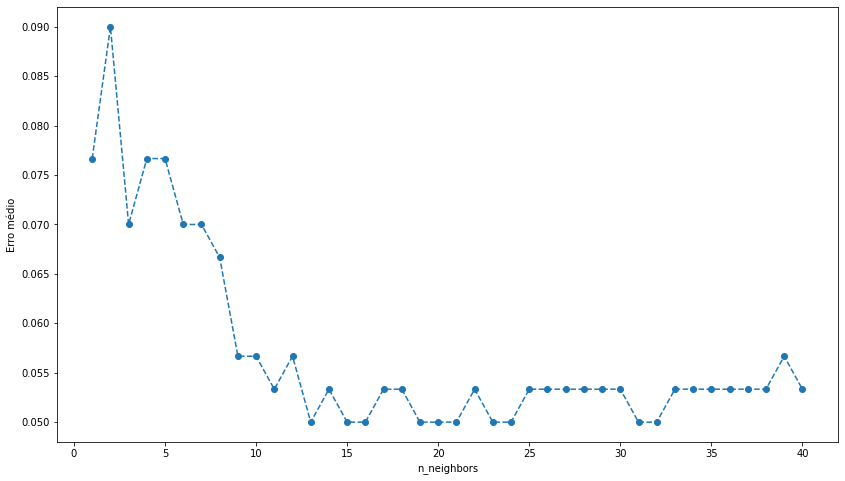

In [32]:
plt.figure(figsize=(14,8))
plt.plot(range(1,41), error_rate, marker='o', linestyle='dashed')
plt.ylabel('Erro médio')
plt.xlabel('n_neighbors')

* Vemos que a partir de uns 13 vizinhos o erro médio começa a oscilar em torno de uma constante, indicando que aumentar muito mais que isso não tem mais eficiência. Vamos então tomar o número de vizinhos igual a 15 e refazer a análise.

In [30]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,Y_train)
predictions = knn.predict(X_test)
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       144
           1       0.94      0.96      0.95       156

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



* Sendo assim, vemos então que a precisão máxima que conseguimos alcançar usando o KNN para esse conjunto de dados é de 95%